# Prediction Algorithms

## Poisson Regression Model - Predicting Scores

### Premier League (18-19)

The Poisson Regression model is often used to model football scores as they are in the form of count data. In this document, I will be using this model to predict actual scores from the user's guesses. In order to maintain consistency when it comes to the teams, I will be using data from the 2017 Premier Leage. 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('once')

In [2]:
bets = pd.read_csv('/Users/Kedest/Desktop/iXperience/Internship/Datasets KMS/ALL_mod copy.csv', sep=';')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bets.head()

,Unnamed: 0,_id,match,user,score,updatedAt,createdAt,points_x,competition,teams.home,...,away_team,profile.club._id,profile.club.name,friends,followedBy,follows,bet_result,result,country,autoPilot
0,0,2222FLLhsnEnDkAHk,f6gX6Thm3Cjch2PWF,arbQRbQCvjJCoWAKC,"{""home"":1,""away"":1}",2018-06-14 15:47:41.831000+00:00,2018-06-14 15:47:41.831000+00:00,0,Kv3xQTRBK4AuFdt9S,vyQwTef3m9iucPFoL,...,Croatia,NaN,NaN,0.0,NaN,1.0,Draw,Away Win,BR,NaN
1,1,2223sF4fov4ky73L6,48BoFrNor5SJ6d4bR,PTYnoCsEiQhWQBW5T,"{""home"":1,""away"":1}",2018-10-03 20:57:02.347000+00:00,2018-10-03 20:57:02.347000+00:00,0,aw3KQEpKHwFsEWtzm,GkiFfDvfT4yw3ipvE,...,Dinamo Zagreb,Dynq2cJq8ps9bw4or,Sporting CP,27.0,NaN,27.0,Draw,Away Win,PT,False
2,2,2226WSvaW4uMRxPoE,SWAhKCrR7hLoFLj3S,uWHGMHtT94CBkXXmM,"{""home"":2,""away"":0}",2018-10-10 16:11:51.440000+00:00,2018-10-10 16:11:51.440000+00:00,3,B9GbBcv8wwDMaPjCE,4De7ezEy3PjGg34C3,...,Paraná,mjkdD8XRHSf2KJZwb,Internacional,0.0,NaN,3.0,Home Win,Home Win,PT,False
3,3,22275FXXRLdDxXmFJ,PDM8EjWJqZPZezZQj,TLei4cSni3yWunoLJ,"{""home"":2,""away"":2}",2018-08-29 00:11:54.428000+00:00,2018-08-29 00:11:54.428000+00:00,0,omDPBWsJQjQKHYiQD,4bi7hpuK4SFexMqBH,...,Tottenham Hotspur,AFH3tH8LjgJt4Zyw9,Benfica,0.0,NaN,5.0,Draw,Home Win,PT,NaN
4,4,2227k75MXgiX97fEh,LvGQoYy7DerEotGba,jeKE63WqLhtFr87iJ,"{""home"":2,""away"":1}",2018-07-03 13:52:28.741000+00:00,2018-07-02 18:10:39.808000+00:00,1,Kv3xQTRBK4AuFdt9S,8MMsHpz7LX4YorZZb,...,Switzerland,NaN,NaN,0.0,NaN,1.0,Home Win,Home Win,SG,NaN


In [4]:
del bets['Unnamed: 0']

In [5]:
col_names = {
 'user' : 'user_id',
 'match': 'match_id',
 'updatedAt': 'updated',
 'createdAt': 'created',
 'teams.home': 'teams_home',
 'teams.away': 'teams_away',
 'score': 'score_bets',
 'score.home': 'score_home',
 'score.away': 'score_away',
 'odds.threeWay.1': 'odds_threeway_1',
 'odds.threeWay.2': 'odds_threeway_2',
 'odds.threeWay.X': 'odds_threeway_x',
 'profile.club._id': 'club_id',
 'profile.club.name': 'club_name',
 'followedBy': 'followed_by',
 'autoPilot': 'autopilot',
 'points_x': 'points'
}

In [6]:
bets = bets.rename(columns=col_names)

In [7]:
del bets['points']

In [8]:
points = pd.read_csv('/Users/Kedest/Desktop/iXperience/Internship/Datasets KMS/new_points.csv')
bets = pd.merge(bets, points, on="_id")

In [11]:
bets['bets_home'] = bets.score_bets.str[8]
bets['bets_away'] = bets.score_bets.str[17]

In [17]:
bets.head()

,_id,match_id,user_id,score_bets,updated,created,competition,teams_home,teams_away,score_home,...,followed_by,follows,bet_result,result,country,autopilot,Unnamed: 0,points,bets_home,bets_away
0,2222FLLhsnEnDkAHk,f6gX6Thm3Cjch2PWF,arbQRbQCvjJCoWAKC,"{""home"":1,""away"":1}",2018-06-14 15:47:41.831000+00:00,2018-06-14 15:47:41.831000+00:00,Kv3xQTRBK4AuFdt9S,vyQwTef3m9iucPFoL,K5z6njJZtwacNEmbE,1.0,...,NaN,1.0,Draw,Away Win,BR,NaN,0,0,1,1
1,2223sF4fov4ky73L6,48BoFrNor5SJ6d4bR,PTYnoCsEiQhWQBW5T,"{""home"":1,""away"":1}",2018-10-03 20:57:02.347000+00:00,2018-10-03 20:57:02.347000+00:00,aw3KQEpKHwFsEWtzm,GkiFfDvfT4yw3ipvE,cCisYnqrPbvLKiRxW,0.0,...,NaN,27.0,Draw,Away Win,PT,False,1,0,1,1
2,2226WSvaW4uMRxPoE,SWAhKCrR7hLoFLj3S,uWHGMHtT94CBkXXmM,"{""home"":2,""away"":0}",2018-10-10 16:11:51.440000+00:00,2018-10-10 16:11:51.440000+00:00,B9GbBcv8wwDMaPjCE,4De7ezEy3PjGg34C3,9Ru4GCkSDcYSXa55B,2.0,...,NaN,3.0,Home Win,Home Win,PT,False,2,3,2,0
3,22275FXXRLdDxXmFJ,PDM8EjWJqZPZezZQj,TLei4cSni3yWunoLJ,"{""home"":2,""away"":2}",2018-08-29 00:11:54.428000+00:00,2018-08-29 00:11:54.428000+00:00,omDPBWsJQjQKHYiQD,4bi7hpuK4SFexMqBH,AXMdntDFga4JxuAdM,2.0,...,NaN,5.0,Draw,Home Win,PT,NaN,3,0,2,2
4,2227k75MXgiX97fEh,LvGQoYy7DerEotGba,jeKE63WqLhtFr87iJ,"{""home"":2,""away"":1}",2018-07-03 13:52:28.741000+00:00,2018-07-02 18:10:39.808000+00:00,Kv3xQTRBK4AuFdt9S,8MMsHpz7LX4YorZZb,dLMyp7pKoMnXzqsMJ,1.0,...,NaN,1.0,Home Win,Home Win,SG,NaN,4,1,2,1


We want to group by the matches because there are thousands of bets for each match. Once we do that, we find the mode of bets for each match. I chose the mode because it would give me the most frequent guess for each match. I'm wokring under the assumption that the more frequently the users guess a certain score for a match, the more likely that that guess is the most accurate guess. 

In [ ]:
bets_mode = bets.groupby([bets.match_id, bets.home_team, bets.away_team]) ['bets_home','bets_away'].agg(lambda x: x.value_counts().index[0])
bets_mode = bets_mode.reset_index()

In [ ]:
bets_mode

Here, I'm merging the bets_mode dataframe - which has information about all the bets - with the matches dataframe which has more information about each match. Once, I merge, I select the columns that I want to use in the regression. 

In [213]:
match = pd.read_csv('/Users/Kedest/Desktop/iXperience/Internship/Datasets KMS/matches_use.csv')
del match['Unnamed: 0']

bets_mode1 = bets_mode.merge(match, on='match_id', how='left')
bets_mode2 = bets_mode1[['match_id','competition','date','home_team','away_team','bets_home','bets_away','score_home','score_away']]

bets_mode2.to_csv('/Users/Kedest/Desktop/iXperience/Internship/Datasets KMS/bets_use.csv')

Here I'm selecting for the matches under the 2017 Premier League competition. 

In [216]:
bets_mode2.date = bets_mode2.date.str.split('T')
bets_mode2.date = bets_mode2.date.str[0]
bets_mode2.date = bets_mode2.date.str.strip('"')

pl = bets_mode2[bets_mode2.competition=='omDPBWsJQjQKHYiQD'] 

pl = pl[(pl.date.str[0:7]=='2018-08') | (pl.date.str[0:7]=='2018-09') | (pl.date.str[0:7]=='2018-10') | (pl.date.str[0:7]=='2018-11') | (pl.date.str[0:7]=='2018-12') | (pl.date.str[0:7]=='2019-01') | (pl.date.str[0:7]=='2019-02') | (pl.date.str[0:7]=='2019-03') | (pl.date.str[0:7]=='2019-04') | (pl.date.str[0:7]=='2019-05')]

In [217]:
pl.bets_home = pl['bets_home'].astype(int)
pl.bets_away = pl['bets_away'].astype(int)

In [218]:
pl.shape
# We end up with 380 matches whose scores and bets we can use to create the poisson regression model. 

(380, 9)

Now that we've prepared the dataset, we can start working on the regression model. 

In [286]:
# Train-test split

from sklearn.model_selection import train_test_split

independent = pl[['home_team','away_team', 'bets_home', 'bets_away']]
target = pl[['score_home', 'score_away']]

X_train, X_test, y_train, y_test = train_test_split(independent, target, test_size = 0.3, random_state=0)

X_train = X_train.reset_index()
y_train = y_train.reset_index()
train_data = X_train.merge(y_train, on='index')

X_test = X_test.reset_index()
y_test = y_test.reset_index()
test_data = X_test.merge(y_test, on='index')

del train_data['index']
del test_data['index']

In [287]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import poisson
from statsmodels.formula.api import negativebinomial

In [293]:
# Creating training and testing dataframes that we can feed into the regression model

goal_model_data = pd.concat([train_data[['home_team','away_team','score_home','bets_home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','score_home':'goals', 'bets_home':'bets'}),
           train_data[['away_team','home_team','score_away','bets_away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','score_away':'goals', 'bets_away':'bets'})])

goal_test_data = pd.concat([test_data[['home_team','away_team','score_home','bets_home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','score_home':'goals', 'bets_home':'bets'}),
           test_data[['away_team','home_team','score_away','bets_away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','score_away':'goals', 'bets_away':'bets'})])

# Fitting the model with the training data

poisson_model = smf.glm(formula="goals ~ home + team + opponent + bets", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()

# poisson_model.summary()

In [298]:
# Using the model to predict the scores for each match in the test data

ls = goal_test_data.bets.tolist()
team_list = goal_test_data.team.tolist()
opponent_list = goal_test_data.opponent.tolist()
pred = []

for i in range(len(goal_test_data)):
    s = poisson_model.predict(pd.DataFrame(data={'team': team_list[i], 'opponent': opponent_list[i],
                                           'home':1, 'bets': ls[i]}, index=[1]))
    pred.append(s[1])
    
goal_test_data['score_pred'] = list(pred)

In [1]:
goal_test_data

NameError: name 'goal_test_data' is not defined

#### Visualization

Text(0, 0.5, 'Predicted Scores')

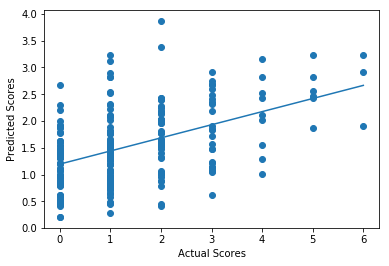

In [290]:
# Visualizing the results of the regression model - a scatter plot with both predicted and actual scores

plt.scatter(goal_test_data.goals, goal_test_data.score_pred)
plt.plot(np.unique(goal_test_data.goals), np.poly1d(np.polyfit(goal_test_data.goals, goal_test_data.score_pred, 1))(np.unique(goal_test_data.goals)))
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

In [291]:
from sklearn.metrics import mean_squared_error
mean_squared_error(goal_test_data.goals, goal_test_data.score_pred) 

1.424517790833752

In [292]:
goal_test_data.goals.corr(goal_test_data.score_pred)

0.4694437016931999

Conclusion: It seems that there might be a slightly positive correlation between the actual scores and the predicted ones. However, there is a lot of noise around the data which makes us less confident in the results. User guesses alone don't seem to accurately predict football scores. 

### Top five teams in the Premier Leage (18-19)

In [227]:
goal_model_data.shape
goal_test_data.shape

(228, 6)

In [228]:
good_teams = ['Manchester United', 'Manchester City', 'Liverpool', 'Tottenham Hotspur', 'Chelsea']
good_model = goal_model_data[(goal_model_data.team.isin(good_teams)) | (goal_model_data.opponent.isin(good_teams))]
good_test = goal_test_data[(goal_test_data.team.isin(good_teams)) | (goal_test_data.opponent.isin(good_teams))]

In [294]:
poisson_model_good = smf.glm(formula="goals ~ home + team + opponent + bets", data=good_model, 
                        family=sm.families.Poisson()).fit()

# poisson_model_good.summary()

In [230]:
ls = good_test.bets.tolist()
team_list = good_test.team.tolist()
opponent_list = good_test.opponent.tolist()
pred_good = []

for i in range(len(good_test)):
    s = poisson_model.predict(pd.DataFrame(data={'team': team_list[i], 'opponent': opponent_list[i],
                                           'home':1, 'bets': ls[i]}, index=[1]))
    pred_good.append(s[1])
    
good_test['score_pred_good'] = list(pred_good)

In [231]:
good_test

,team,opponent,goals,bets,home,score_pred,score_pred_good
2,Manchester United,West Ham United,2.0,2,1,2.402031,2.402031
4,Manchester City,Burnley,5.0,3,1,3.226475,3.226475
7,West Ham United,Liverpool,1.0,1,1,0.479499,0.479499
11,Manchester City,Chelsea,6.0,2,1,1.910910,1.910910
14,Chelsea,Wolverhampton Wanderers,1.0,2,1,1.631462,1.631462
17,Burnley,Manchester City,0.0,0,1,0.615432,0.615432
19,Arsenal,Tottenham Hotspur,4.0,2,1,1.290316,1.290316
24,Fulham,Tottenham Hotspur,1.0,0,1,0.797764,0.797764
25,Tottenham Hotspur,Watford,2.0,2,1,2.286262,2.286262
26,Liverpool,Burnley,4.0,3,1,2.813121,2.813121


#### Visualization

Text(0, 0.5, 'Predicted Scores')

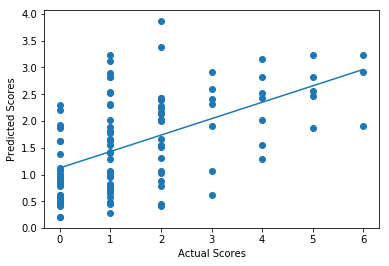

In [232]:
# Visualizing the results of the regression model - a scatter plot with both predicted and actual scores

plt.scatter(good_test.goals, good_test.score_pred_good)
plt.plot(np.unique(good_test.goals), np.poly1d(np.polyfit(good_test.goals, good_test.score_pred_good, 1))(np.unique(good_test.goals)))
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

In [233]:
from sklearn.metrics import mean_squared_error
mean_squared_error(good_test.goals, good_test.score_pred_good) 

1.6608045022884135

In [280]:
good_test.goals.corr(good_test.score_pred_good)

0.534343012327701

## Logistic Regression Model - Predicting Match Outcomes

As we've seen above, using user guesses to predict football scores has not been very successful. However, predicting match results might be easier as there are a very limited number of choices that the use has when placing their bets. We will continue using the 2017 Premier League matches to create this model. 

In [234]:
# Pre-processing the dataframe for the regression model

bets_results = bets.groupby([bets.match_id, bets.competition, bets.home_team, bets.away_team]) ['result','bet_result'].agg(lambda x: x.value_counts().index[0])
bets_results = bets_results.reset_index()

bets_results = bets_results.merge(match[['match_id', 'date']], on='match_id', how='left')
pl_results = bets_results[bets_results['competition']=='omDPBWsJQjQKHYiQD']

pl_results.date = pl_results.date.str.split('T')
pl_results.date = pl_results.date.str[0]
pl_results.date = pl_results.date.str.strip('"')
pl_results = pl_results[(pl_results.date.str[0:7]=='2018-08') | (pl_results.date.str[0:7]=='2018-09') | (pl_results.date.str[0:7]=='2018-10') | (pl_results.date.str[0:7]=='2018-11') | (pl_results.date.str[0:7]=='2018-12') | (pl_results.date.str[0:7]=='2019-01') | (pl_results.date.str[0:7]=='2019-02') | (pl_results.date.str[0:7]=='2019-03') | (pl_results.date.str[0:7]=='2019-04') | (pl_results.date.str[0:7]=='2019-05')]
pl_results = pl_results.reset_index()

Once we have the dataframe ready, we want to encode our dependent varaibles. In this case, our dependent variables is the user's guesses for the results of the matches. We use on-hot encoding to turn this categorical variable into a numerical one that we can feed into the regression. 

In [235]:
pl_results.result = pl_results.result.astype("category")
pl_results.bet_result = pl_results.bet_result.astype("category")

cat_var = pl_results[['bet_result']]
cat_var = pd.get_dummies(cat_var)

pl_results = pd.concat([pl_results,cat_var], axis=1)

In [236]:
pl_results

,index,match_id,competition,home_team,away_team,result,bet_result,date,bet_result_Away Win,bet_result_Draw,bet_result_Home Win
0,2,22vujJzPgzNszGc5N,omDPBWsJQjQKHYiQD,Everton,Wolverhampton Wanderers,Away Win,Away Win,2019-02-02,1,0,0
1,46,2XWLKTEoE5utrQz3v,omDPBWsJQjQKHYiQD,West Ham United,Chelsea,Draw,Away Win,2018-09-23,1,0,0
2,53,2bxq6XA4tWTvMDTLh,omDPBWsJQjQKHYiQD,Tottenham Hotspur,West Ham United,Away Win,Home Win,2019-04-27,0,0,1
3,54,2cRrnxq3SBSxsFuCh,omDPBWsJQjQKHYiQD,Watford,AFC Bournemouth,Away Win,Home Win,2018-10-06,0,0,1
4,104,3CnCpXW4ZfDDsAiJt,omDPBWsJQjQKHYiQD,Leicester City,Watford,Home Win,Home Win,2018-12-01,0,0,1
5,108,3GwXbFk2djJheHids,omDPBWsJQjQKHYiQD,Manchester United,Watford,Home Win,Home Win,2019-03-30,0,0,1
6,110,3J2G593g2nAPvcS2G,omDPBWsJQjQKHYiQD,West Ham United,Newcastle United,Home Win,Home Win,2019-03-02,0,0,1
7,113,3Jjq3W5wbTFoprtuc,omDPBWsJQjQKHYiQD,Chelsea,Huddersfield Town,Home Win,Home Win,2019-02-02,0,0,1
8,134,3cmwpEZCSJaKpQQod,omDPBWsJQjQKHYiQD,Newcastle United,Liverpool,Away Win,Away Win,2019-05-04,1,0,0
9,154,3szfqwSiyHcezMwuK,omDPBWsJQjQKHYiQD,Arsenal,Liverpool,Draw,Away Win,2018-11-03,1,0,0


In [237]:
# Splitting the data into train and test and running the regression

from sklearn.linear_model import LogisticRegression

independent = cat_var
target = pl_results.result
X_train, X_test, y_train, y_test = train_test_split(independent,target,test_size=0.3)

lr = LogisticRegression(solver = 'newton-cg', multi_class='multinomial')
lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
y_test = pd.DataFrame(y_test).reset_index()
y_test_pred = pd.DataFrame(y_test_pred).reset_index()
del y_test_pred['index']
del y_test['index']

We can now evaluate the result of the regression. 

In [238]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print('accuracy', accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

accuracy 0.5964912280701754
              precision    recall  f1-score   support

    Away Win       0.62      0.62      0.62        45
        Draw       0.00      0.00      0.00        20
    Home Win       0.58      0.82      0.68        49

   micro avg       0.60      0.60      0.60       114
   macro avg       0.40      0.48      0.43       114
weighted avg       0.49      0.60      0.54       114



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


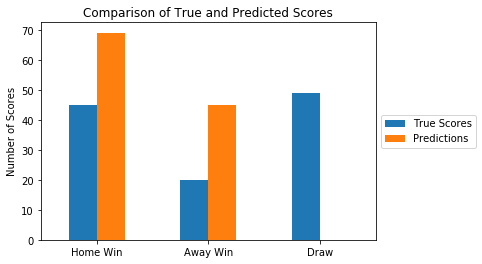

In [239]:
# Visualizing the results

compare = {'Home Win': [y_test.result.value_counts()[0], y_test_pred[0].value_counts()[0]], 'Away Win': [y_test.result.value_counts()[1], y_test_pred[0].value_counts()[1]], 'Draw': [y_test.result.value_counts()[2], 0]}
compare_vis = pd.DataFrame.from_dict(compare, orient='index', columns=['True Scores','Predictions'])

compare_vis.plot.bar()
plt.xticks(rotation=360)
plt.ylabel('Number of Scores')
plt.title('''Comparison of True and Predicted Scores''')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Top 5 Teams

In [241]:
good_teams = ['Manchester United', 'Manchester City', 'Liverpool', 'Tottenham Hotspur', 'Chelsea']
good = pl_results[(pl_results.home_team.isin(good_teams)) | (pl_results.away_team.isin(good_teams))]

In [242]:
independent_good = good[['bet_result_Away Win', 'bet_result_Draw', 'bet_result_Home Win']]
target_good = good['result']

X_train_good, X_test_good, y_train_good, y_test_good = train_test_split(independent_good,target_good,test_size=0.3)

lr = LogisticRegression(solver = 'newton-cg', multi_class='multinomial')
lr.fit(X_train_good, y_train_good)
y_test_pred_good = lr.predict(X_test_good)

y_test_good = pd.DataFrame(y_test_good).reset_index()
y_test_pred_good = pd.DataFrame(y_test_pred_good).reset_index()
del y_test_pred_good['index']
del y_test_good['index']

In [252]:
accuracy = accuracy_score(y_test_good, y_test_pred_good)
print('accuracy', accuracy)

accuracy 0.7058823529411765


## KNN - Predicting Match Outcomes

In [268]:
results = pd.read_csv('/Users/Kedest/Desktop/iXperience/Internship/Datasets KMS/match_results_use.csv')
del results['Unnamed: 0']

In [269]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [271]:
knn = KNeighborsClassifier()

parameters_knn = {'n_neighbors':[1,3,5,7,9,11], 'metric':['chebyshev', 'manhattan', 'euclidean']}
grid_search_knn = GridSearchCV(knn, param_grid = parameters_knn, scoring='accuracy', cv=5, iid=False)

In [277]:
independent_knn = results[['bet_result_Away Win','bet_result_Draw','bet_result_Home Win']]
target_knn = results['result']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(independent_knn,target_knn,test_size=0.3)

grid_search_knn.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11], 'metric': ['chebyshev', 'manhattan', 'euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [275]:
y_test_pred_knn = grid_search_knn.predict(X_test_knn)

In [276]:
accuracy_score(y_test_knn, y_test_pred_knn)

0.5964912280701754

## Model Stacking

In [253]:
# USING BETS

goal_model_data = pd.concat([train_data[['home_team','away_team','score_home','bets_home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','score_home':'goals', 'bets_home':'bets'}),
           train_data[['away_team','home_team','score_away','bets_away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','score_away':'goals', 'bets_away':'bets'})])

goal_test_data = pd.concat([test_data[['home_team','away_team','score_home','bets_home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','score_home':'goals', 'bets_home':'bets'}),
           test_data[['away_team','home_team','score_away','bets_away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','score_away':'goals', 'bets_away':'bets'})])

In [254]:
# Fitting

poisson_model_bets = smf.glm(formula="goals ~ home + team + opponent + bets", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()

poisson_model_bets.summary()

# Predicting

ls = goal_test_data.bets.tolist()
team_list = goal_test_data.team.tolist()
opponent_list = goal_test_data.opponent.tolist()
pred = []

for i in range(len(goal_test_data)):
    s = poisson_model_bets.predict(pd.DataFrame(data={'team': team_list[i], 'opponent': opponent_list[i],
                                           'home':1, 'bets': ls[i]}, index=[1]))
    pred.append(s[1])
    
goal_test_data['score_pred_bets'] = list(pred)

In [278]:
# NO BETS

# Fitting
poisson_model_nobets = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()

poisson_model_nobets.summary()

# Predicting
team_list = goal_test_data.team.tolist()
opponent_list = goal_test_data.opponent.tolist()
pred_nobets = []

for i in range(len(goal_test_data)):
    s = poisson_model_nobets.predict(pd.DataFrame(data={'team': team_list[i], 'opponent': opponent_list[i],
                                           'home':1}, index=[1]))
    pred_nobets.append(s[1])
    
goal_test_data['score_pred_nobets'] = list(pred_nobets)

In [256]:
goal_test_data

,team,opponent,goals,bets,home,score_pred_bets,score_pred_nobets
0,Wolverhampton Wanderers,Brighton & Hove Albion,0.0,2,1,1.309421,1.374747
1,Fulham,Southampton,3.0,1,1,1.214104,1.232391
2,Manchester United,West Ham United,2.0,2,1,2.402031,2.319735
3,Fulham,Wolverhampton Wanderers,1.0,1,1,0.889013,0.956957
4,Manchester City,Burnley,5.0,3,1,3.226475,3.117129
5,Crystal Palace,Brighton & Hove Albion,1.0,2,1,1.420247,1.641595
6,Southampton,West Ham United,1.0,1,1,1.462006,1.449140
7,West Ham United,Liverpool,1.0,1,1,0.479499,0.509884
8,AFC Bournemouth,Everton,2.0,1,1,1.808449,1.763856
9,West Ham United,Everton,0.0,1,1,1.480448,1.358063


In [257]:
from sklearn.linear_model import LinearRegression

X = goal_test_data[['score_pred_nobets', 'score_pred_bets']]
y = goal_test_data['goals']

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, test_size=0.30, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_train_lm,y_train_lm)
stack_pred = linear_model.predict(X_test_lm)

In [258]:
y_test_lm = pd.DataFrame(y_test_lm)
y_test_lm['stack_pred'] = stack_pred
y_test_lm

,goals,stack_pred
25,1.0,1.047208
86,1.0,1.236182
8,2.0,1.745228
71,1.0,1.314144
27,3.0,2.567575
96,3.0,0.942768
101,2.0,2.196011
75,1.0,0.859744
96,2.0,1.881718
56,2.0,1.140088


Text(0, 0.5, 'Predicted Scores from Model Stacking')

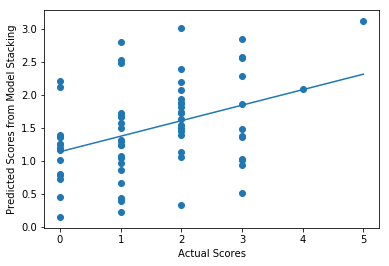

In [259]:
# Visualizing the results of the regression model - a scatter plot with both predicted and actual scores

plt.scatter(y_test_lm.goals, y_test_lm.stack_pred)
plt.plot(np.unique(y_test_lm.goals), np.poly1d(np.polyfit(y_test_lm.goals, y_test_lm.stack_pred, 1))(np.unique(y_test_lm.goals)))
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores from Model Stacking')

In [266]:
mean_squared_error(y_test_lm.goals, y_test_lm.stack_pred) 

1.1756225366821538

In [279]:
y_test_lm.goals.corr(y_test_lm.stack_pred)

0.40244168091169735

In [261]:
pl_results.to_csv('/Users/Kedest/Desktop/iXperience/Internship/Datasets KMS/match_results_use.csv')

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/2017,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/2017,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/2017,Chelsea,Burnley,2,3,A,0,3,A,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/2017,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/2017,Everton,Stoke,1,0,H,1,0,H,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42
